In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tracks_ready=pd.read_csv('C:/Users/Asus/Downloads/tracks_ready.csv',sep=',')

In [9]:
features=['centroid_lon',
 'centroid_lat',
 'time_spent',
 'distance',
 'age',
 'car_owners',
 'carsharing_user',
 'not_citizen_rf',
 'gender',
 'healthy_food_inter',
 'income',
 'public_trnsprt_user',
 'pharmacies_inter',
 'beauty_salon_inter',
 'elite_sports_inter',
 'sprtswr_ftwr_inter',
 'sprt_good_inter',
 'trvl_rus',
 'trvl_abrd',
 'sprt_fit_inter',
 'hunting_fishing_inter',
 'fashion_inter',
 'coffee_inter',
 'med_serv_inter',
 'education_inter',
 'delivery_inter',
 'markets_inter',
 'no_children',
 'in spb',
 'dist from center',
 'IWD',
 '/finansyi/',
 '/proizvodstvo-i-postavki/',
 '/reklama/',
 '/sport-i-fitnes/',
 '/spravochno-informatsionnyie-sistemyi/',
 '/sredstva-massovoj-informatsii/',
 '/stroitelstvo-i-remont/',
 '/telekommunikatsii-i-svyaz/',
 '/tovaryi-dlya-detej/',
 '/transport/',
 '/uslugi/',
 'RE-service',
 'additional education',
 'agzs or azs',
 'apteki',
 'avto_buy',
 'avto_service',
 'avto_shop',
 'bezopasnost',
 'biznes',
 'cemetery',
 'clothes',
 'dom-i-interer',
 'eda-i-napitki',
 'furniture',
 'gai-gibdd',
 'gosudarstvo-i-obschestvo',
 'hobby',
 'hospital',
 'hospitality',
 'internet-service',
 'kindergarten',
 'kino',
 'krasota-i-zdorove',
 'library',
 'med-service',
 'med-shop',
 'metro',
 'museum',
 'nochnye-kluby',
 'otdyih-i-razvlecheniya',
 'park',
 'pozharnye-chasti',
 'punkt-vydachi',
 'religion',
 'rynki',
 'safety-shop',
 'school',
 'shop',
 'sluzhby-ekstrennogo-vyzova',
 'sluzhby-spaseniia',
 'social housing',
 'sport',
 'sport shop',
 'supermarket',
 'tech',
 'theater',
 'torgovye-centry',
 'tourism services',
 'tovaryi-dlya-detej',
 'university',
 'upravlenie-obrazovaniem',
 'vet clinics',
 'vet service',
 'vet-shop',
 'time_spent_at_all',
 'top5',
 'part_of_day_s',
 'part_of_day_e',
 'part_of_day_s_len',
 'part_of_day_e_len',
 'level_of_visit%',
 'top5_fr',
 'number of visits of hex',
 'time_spent_avr',
 'top5_avr',
 'num of days appear',
 'num of days appear fr',
 'number of visits of hex per day',
 'time_spent_avr_h',
 'weekend',
 'morning',
 'night',
 'whole day',
 'whole day end',
 'working hours',
 'evening']

In [5]:
features=['centroid_lon',
 'centroid_lat',
 'time_spent',
 'distance',
 'age',
 'car_owners',
 'carsharing_user',
 'not_citizen_rf',
 'gender',
 'healthy_food_inter',
 'income',
 'public_trnsprt_user',
 'pharmacies_inter',
 'beauty_salon_inter',
 'elite_sports_inter',
 'sprtswr_ftwr_inter',
 'sprt_good_inter',
 'trvl_rus',
 'trvl_abrd',
 'sprt_fit_inter',
 'hunting_fishing_inter',
 'fashion_inter',
 'coffee_inter',
 'med_serv_inter',
 'education_inter',
 'delivery_inter',
 'markets_inter',
 'no_children']

In [6]:
x = tracks_ready.loc[:, features].values

In [7]:
x.shape

(1137802, 28)

In [8]:
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

# Create a list to hold the distortions (inertia) for each number of clusters
distortions = []

# Generate some sample data (replace this with your actual dataset)
# X = ...

# Fit KMeans and calculate the distortions for a range of number of clusters
for k in range(1, 8):
    kmeanModel = KMeans(n_clusters=k).fit(principalDf.values)
    kmeanModel.fit(principalDf.values)
    distortions.append(sum(np.min(cdist(principalDf.values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / principalDf.values.shape[0])
    print(k)



1
2
3
4
5
6
7


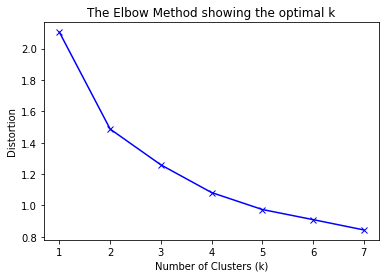

In [24]:
plt.plot(range(1, 8), distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() 

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(principalDf.values)


KMeans(n_clusters=5)

In [27]:
len(kmeans.labels_)

1137802

In [28]:
principalDf['cluster']=kmeans.labels_

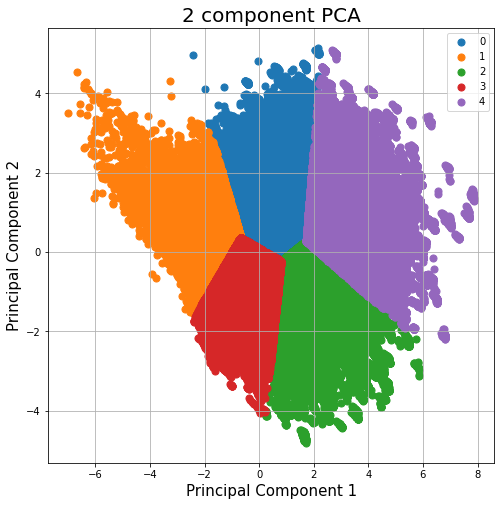

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = np.unique(kmeans.labels_)
for target in zip(targets):
    indicesToKeep = principalDf['cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()